In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import ast


## OVERALL RESULTS

In [2]:
from continual_hate.utils import clean_up_df

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_cl = pd.read_csv("df_cl_metrics_NOES.csv")

In [388]:
# model =    (df_cl["model"]== "FacebookAI/roberta-base")
# technique= (df_cl["cl_technique"] == "lwf")
# exp = (df_cl["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval")
# df_cl[model & technique & exp]

In [389]:
df_cl.columns

Index(['model', 'cl_technique', 'experiment_name', 'time', 'best_epochs',
       'current_num_samples_training', 'learning_rate', 'hyperparams', 'last',
       'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric'],
      dtype='object')

CL Metrics over agg experiments

In [390]:
std = clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], index=["model", "cl_technique"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

In [391]:
clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], index=["model", "cl_technique"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

LAST  Average Incremental F1  Transfer   BWT   FWT
model    cl_technique                                                    
RoBERTa  A-GEM         0.74                    0.74      0.74  0.01  0.33
         EWC           0.66                    0.71      0.67 -0.10  0.26
         LwF           0.70                    0.71      0.70 -0.01  0.31
         MAS           0.67                    0.69      0.68 -0.01  0.33
         SEQ-FT        0.68                    0.71      0.69 -0.06  0.27
HateBERT A-GEM         0.72                    0.70      0.70  0.02  0.12
         EWC           0.68                    0.69      0.67 -0.03  0.09
         LwF           0.68                    0.68      0.68  0.00  0.14
         MAS           0.63                    0.63      0.64  0.02  0.20
         SEQ-FT        0.69                    0.67      0.64 -0.01  0.06
fBERT    A-GEM         0.72                    0.72      0.72  0.00 -0.07
         EWC           0.68                    0.69      0.67 -0.01 -0.11
         LwF           0.69                    0.69      0.69  0.01 -0.10
         MAS           0.60                    0.64      0.65  0.01 -0.07
         SEQ-FT        0.70                    0.69      0.67 -0.00 -0.11

In [392]:
# for exp in df_cl["experiment_name"].unique():
    
#     clean_up_df(df_cl[(df_cl["metric"]=="f1_score") & (df_cl["experiment_name"]==exp)].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], index=["model", "cl_technique"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex(exp)

BY CL TECHNIQUE


In [393]:
clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
                                                        index=["cl_technique"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

,LAST,Average Incremental F1,Transfer,BWT,FWT
cl_technique,,,,,
A-GEM,0.73,0.72,0.72,0.01,0.13
EWC,0.67,0.69,0.67,-0.05,0.08
LwF,0.69,0.69,0.69,0.00,0.12
MAS,0.63,0.65,0.66,0.00,0.15
SEQ-FT,0.69,0.69,0.67,-0.02,0.07


In [394]:
clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
                                                        index=["cl_technique"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

,LAST,Average Incremental F1,Transfer,BWT,FWT
cl_technique,,,,,
A-GEM,0.02,0.09,0.10,0.04,0.18
EWC,0.05,0.06,0.06,0.06,0.17
LwF,0.05,0.09,0.10,0.05,0.19
MAS,0.04,0.10,0.12,0.02,0.19
SEQ-FT,0.05,0.07,0.07,0.07,0.17


In [395]:
# clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
#                                                         index=["cl_technique"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("cl_metrics_agg_by_technique")

Overall CL Metrics

In [396]:
# clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
#                                                         index=["cl_technique"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("std_cl_metrics_agg_by_technique")

BY EXPERIMENT

In [397]:
df_cl["cl_technique"].unique()

array(['vanilla_ft', 'agem', 'ewc', 'lwf', 'mas'], dtype=object)

In [398]:
clean_up_df(df_cl[(df_cl["metric"]=="f1_score") & (df_cl["cl_technique"] != "vanilla_ft")].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
                                                        index=["experiment_name"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

,LAST,Average Incremental F1,Transfer,BWT,FWT
experiment_name,,,,,
Gen. -> Alt. Mis. & Rac.,0.66,0.76,0.78,-0.04,0.17
Alt. Mis. & Rac.,0.70,0.72,0.71,-0.01,0.09
Rac. -> Mis.,0.69,0.59,0.57,0.03,0.10


In [399]:
clean_up_df(df_cl[(df_cl["metric"]=="f1_score") & (df_cl["cl_technique"] != "vanilla_ft")].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
                                                        index=["experiment_name"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

,LAST,Average Incremental F1,Transfer,BWT,FWT
experiment_name,,,,,
Gen. -> Alt. Mis. & Rac.,0.04,0.02,0.02,0.04,0.16
Alt. Mis. & Rac.,0.05,0.05,0.06,0.05,0.16
Rac. -> Mis.,0.05,0.04,0.04,0.03,0.21


In [400]:

# clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
#                                                         index=["experiment_name"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("by_experiment")
# clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
#                                                         index=["experiment_name"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("std_by_experiment")

BY MODEL

In [401]:
clean_up_df(df_cl[(df_cl["metric"]=="f1_score") & (df_cl["cl_technique"] != "vanilla_ft")].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
                                                        index=["model"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

,LAST,Average Incremental F1,Transfer,BWT,FWT
model,,,,,
RoBERTa,0.69,0.71,0.70,-0.03,0.31
HateBERT,0.68,0.68,0.67,0.00,0.13
fBERT,0.67,0.69,0.68,0.00,-0.09


In [402]:
clean_up_df(df_cl[(df_cl["metric"]=="f1_score") & (df_cl["cl_technique"] != "vanilla_ft")].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
                                                        index=["model"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2))

,LAST,Average Incremental F1,Transfer,BWT,FWT
model,,,,,
RoBERTa,0.05,0.09,0.11,0.06,0.06
HateBERT,0.05,0.09,0.09,0.05,0.05
fBERT,0.05,0.08,0.09,0.02,0.08


In [403]:
# clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
#                                                         index=["model"])[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("by_model")
# clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table(values=["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"], 
#                                                         index=["model"], aggfunc=np.std)[["last", "avg_incremental_f1", "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("std_by_model")

## Individual Performances for the best models of each experiment

In [4]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from continual_hate.utils import clean_up_df

In [5]:
df = pd.read_csv("df_plm_cl_NOES.csv")

In [6]:
m_ft = pd.read_csv("df_plm_merged_ft.csv")
ft = pd.read_csv("df_plm_ft.csv")

In [407]:
m_ft.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [408]:
# m_ft["dataset_currently_testing"]

In [7]:
cols = ["model","experiment_name", "time", "cl_technique", 'dataset_currently_training', 'dataset_wrt_training_datasets', 'dataset_currently_testing', 'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score']

### RAC MIS

In [33]:
df["experiment_name"].unique()

array(['davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism',
       'evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant',
       'hateval-immigrant-TO-waseem-racism-TO-ibereval'], dtype=object)

In [34]:
hateval_df = df[df["experiment_name"] == 'hateval-immigrant-TO-waseem-racism-TO-ibereval']
hat_merged_df = m_ft[(m_ft["experiment_name"] == 'hateval-immigrant-TO-waseem-racism-TO-ibereval') & (m_ft["model"] == "FacebookAI/roberta-base")][cols]
roberta_agem_hateval = hateval_df[(hateval_df["cl_technique"] == "agem") & (hateval_df["model"] == "FacebookAI/roberta-base") & (hateval_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols]
roberta_agem_hateval_zero_shots = hateval_df[(hateval_df["cl_technique"] == "agem") & (hateval_df["model"] == "FacebookAI/roberta-base") & (hateval_df["dataset_wrt_training_datasets"] == "ZERO_SHOT_not_in_training_stream")][cols]

In [35]:
# hateval_df[(hateval_df["cl_technique"] == "vanilla_ft") & (hateval_df["model"] == "FacebookAI/roberta-base") & (hateval_df["time"] == 2)].round(2)

In [36]:
cols = ["model","experiment_name", "cl_technique", 'dataset_wrt_training_datasets', 'dataset_currently_testing', 'HATE_f1_score']

In [37]:
hatevla_hate = hateval_df[(hateval_df["cl_technique"] == "vanilla_ft") & (hateval_df["time"] == 2 )& (hateval_df["model"] == "FacebookAI/roberta-base") & (hateval_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols].round(2)

In [38]:
hatevla_hate["HATE_f1_score_rob"] =hateval_df[(hateval_df["cl_technique"] == "agem") & (hateval_df["time"] == 2 )& (hateval_df["model"] == "FacebookAI/roberta-base") & (hateval_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")]["HATE_f1_score"].round(2).to_list()

In [39]:
hatevla_hate

,model,experiment_name,cl_technique,dataset_wrt_training_datasets,dataset_currently_testing,HATE_f1_score,HATE_f1_score_rob
200,FacebookAI/roberta-base,hateval-immigrant-TO-waseem-racism-TO-ibereval,vanilla_ft,TRAINING_PASSED,hateval-immigrant,0.60,0.62
201,FacebookAI/roberta-base,hateval-immigrant-TO-waseem-racism-TO-ibereval,vanilla_ft,TRAINING_PASSED,waseem-racism,0.64,0.73
202,FacebookAI/roberta-base,hateval-immigrant-TO-waseem-racism-TO-ibereval,vanilla_ft,IN_TRAINING,ibereval,0.87,0.85


In [40]:
hate_evalita = evalita_df[(evalita_df["cl_technique"] == "vanilla_ft") & (evalita_df["time"] == 3 )& (evalita_df["model"] == "FacebookAI/roberta-base") & (evalita_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols].round(2)

NameError: name 'evalita_df' is not defined

In [31]:
hate_evalita

NameError: name 'hate_evalita' is not defined

In [417]:
hate_evalita["HATE_f1_score_rob"] = evalita_df[(evalita_df["cl_technique"] == "agem") & (evalita_df["time"] == 3 )& (evalita_df["model"] == "FacebookAI/roberta-base") & (evalita_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")]["HATE_f1_score"].round(2).to_list()

In [418]:
hate_evalita

,model,experiment_name,cl_technique,dataset_wrt_training_datasets,dataset_currently_testing,HATE_f1_score,HATE_f1_score_rob
176,FacebookAI/roberta-base,evalita-TO-waseem-racism-TO-ibereval-TO-hateva...,vanilla_ft,TRAINING_PASSED,evalita,0.71,0.76
177,FacebookAI/roberta-base,evalita-TO-waseem-racism-TO-ibereval-TO-hateva...,vanilla_ft,TRAINING_PASSED,waseem-racism,0.67,0.73
178,FacebookAI/roberta-base,evalita-TO-waseem-racism-TO-ibereval-TO-hateva...,vanilla_ft,TRAINING_PASSED,ibereval,0.91,0.94
179,FacebookAI/roberta-base,evalita-TO-waseem-racism-TO-ibereval-TO-hateva...,vanilla_ft,IN_TRAINING,hateval-immigrant,0.62,0.62


In [32]:
hate_davidson = davidson_df[(davidson_df["cl_technique"] == "vanilla_ft") & (davidson_df["time"] == 5)& (davidson_df["model"] == "FacebookAI/roberta-base") & (davidson_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols].round(2)

NameError: name 'davidson_df' is not defined

In [420]:
hate_davidson["HATE_f1_score_rob"] =  davidson_df[(davidson_df["cl_technique"] == "agem") & (davidson_df["time"] == 5)& (davidson_df["model"] == "FacebookAI/roberta-base") & (davidson_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")]["HATE_f1_score"].round(2).to_list()

In [421]:
hate_davidson

,model,experiment_name,cl_technique,dataset_wrt_training_datasets,dataset_currently_testing,HATE_f1_score,HATE_f1_score_rob
144,FacebookAI/roberta-base,davidson-TO-founta_hateful_57k-TO-ibereval-TO-...,vanilla_ft,TRAINING_PASSED,davidson,0.59,0.87
145,FacebookAI/roberta-base,davidson-TO-founta_hateful_57k-TO-ibereval-TO-...,vanilla_ft,TRAINING_PASSED,founta_hateful_57k,0.16,0.54
146,FacebookAI/roberta-base,davidson-TO-founta_hateful_57k-TO-ibereval-TO-...,vanilla_ft,TRAINING_PASSED,ibereval,0.67,0.77
147,FacebookAI/roberta-base,davidson-TO-founta_hateful_57k-TO-ibereval-TO-...,vanilla_ft,TRAINING_PASSED,hateval-immigrant,0.11,0.64
148,FacebookAI/roberta-base,davidson-TO-founta_hateful_57k-TO-ibereval-TO-...,vanilla_ft,TRAINING_PASSED,hateval-women,0.66,0.65
149,FacebookAI/roberta-base,davidson-TO-founta_hateful_57k-TO-ibereval-TO-...,vanilla_ft,IN_TRAINING,waseem-racism,0.09,0.44


In [422]:
concat_hate = pd.concat([hate_davidson, hate_evalita, hatevla_hate], axis=0)

In [423]:
concat_hate.columns

Index(['model', 'experiment_name', 'cl_technique',
       'dataset_wrt_training_datasets', 'dataset_currently_testing',
       'HATE_f1_score', 'HATE_f1_score_rob'],
      dtype='object')

In [426]:
# clean_up_df(concat_hate[["Experiment Name", "Testing Dataset", "Hate Class F1 Score", "HATE_f1_score_rob"]]).round(2).to_latex("diff_hate_table.tex")

In [430]:
# train_ds_hateval = ast.literal_eval(hat_merged_df["dataset_currently_training"].unique()[0])
# hat_merged_df["dataset_currently_training"] = hat_merged_df[hat_merged_df["dataset_currently_testing"].isin(train_ds_hateval)]["dataset_currently_training"].apply(lambda x: "Trained")
# hat_merged_df["dataset_currently_training"].fillna("Zero Shot", inplace=True)

In [429]:
hat_merged_df[["model", "dataset_currently_training", "dataset_currently_testing",	"f1_score",	"HATE_f1_score"]].round(2)

,model,dataset_currently_training,dataset_currently_testing,f1_score,HATE_f1_score
32,FacebookAI/roberta-base,Trained,hateval-immigrant,0.49,0.62
33,FacebookAI/roberta-base,Trained,waseem-racism,0.85,0.74
34,FacebookAI/roberta-base,Trained,ibereval,0.88,0.85
35,FacebookAI/roberta-base,Zero Shot,evalita,0.62,0.60
36,FacebookAI/roberta-base,Zero Shot,davidson,0.75,0.60
37,FacebookAI/roberta-base,Zero Shot,founta_hateful_57k,0.64,0.31
38,FacebookAI/roberta-base,Zero Shot,hateval-women,0.49,0.63
39,FacebookAI/roberta-base,Zero Shot,waseem-sexism,0.50,0.14


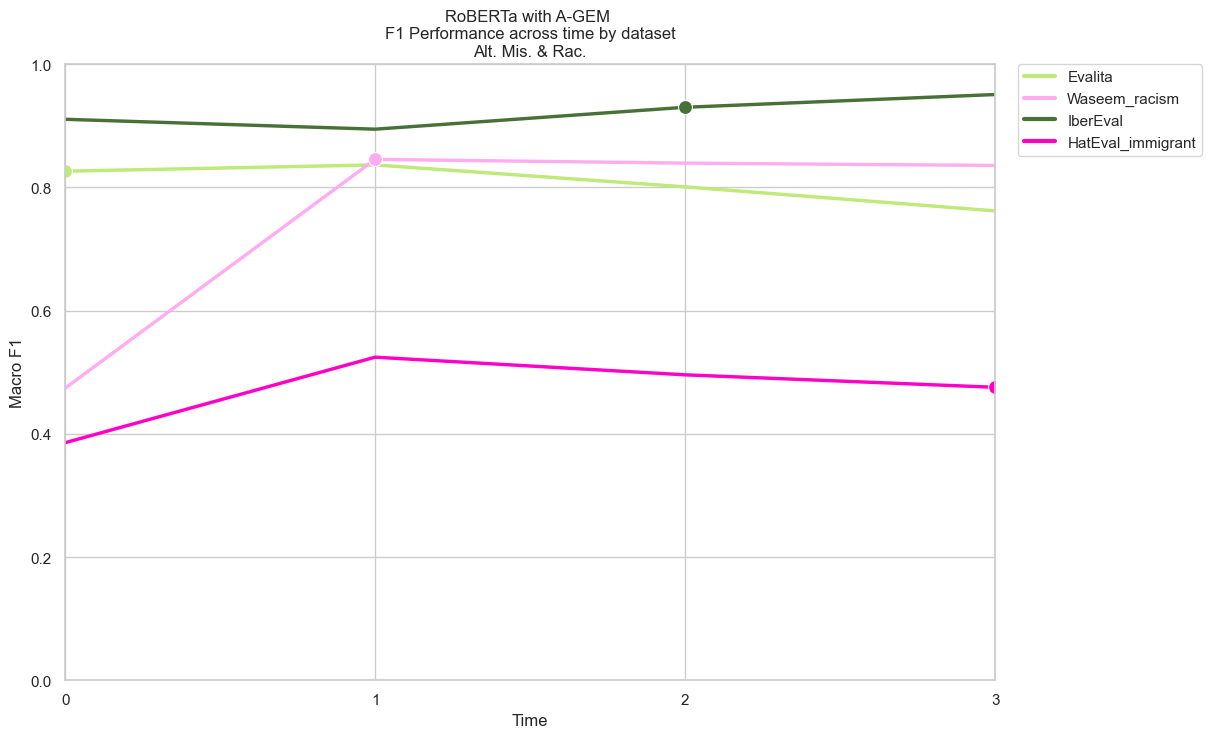

In [437]:
get_line_plot(model="FacebookAI/roberta-base", cl_technique="agem", df_experiment=df_evalita[df_evalita["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream"])

In [ ]:
# clean_up_df(hat_merged_df[["model", "dataset_currently_training", "dataset_currently_testing",	"f1_score",	"HATE_f1_score"]].round(2)).to_latex("merged_hateval")

In [ ]:
# clean_up_df(roberta_agem_hateval).columns

Index(['Model', 'Time', 'Continual Learning Technique', 'Training Dataset',
       'Position of the Dataset wrt the Datastream', 'Testing Dataset',
       'F1 Score', 'Precision', 'Recall', 'Accuracy', 'Hate Class F1 Score'],
      dtype='object')

In [ ]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

## Alt MIS RAC

In [55]:
evalita_df = df[df["experiment_name"] == 'evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant']
evalita_merged_df = m_ft[(m_ft["experiment_name"] == 'evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant') & (m_ft["model"] == "FacebookAI/roberta-base")]
roberta_agem_evalita = evalita_df[(evalita_df["cl_technique"] == "agem") & (evalita_df["model"] == "FacebookAI/roberta-base") & (evalita_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols]
roberta_agem_evalita_zero_shots = evalita_df[(evalita_df["cl_technique"] == "agem") & (evalita_df["model"] == "FacebookAI/roberta-base") & (evalita_df["dataset_wrt_training_datasets"] == "ZERO_SHOT_not_in_training_stream")][cols]

In [52]:
evalita_df[(evalita_df["model"] =="FacebookAI/roberta-base" ) & (evalita_df["time"] == 3) & (evalita_df["cl_technique"] =="agem" )][["f1_score", "HATE_f1_score"]].round(2)


,f1_score,HATE_f1_score
1216,0.76,0.76
1217,0.84,0.73
1218,0.95,0.94
1219,0.48,0.62
1220,0.65,0.43
1221,0.62,0.28
1222,0.56,0.65
1223,0.60,0.34


In [57]:
# evalita_merged_df.round(2)

In [42]:
train_ds_eval = ast.literal_eval(evalita_merged_df["dataset_currently_training"].unique()[0])
evalita_merged_df["dataset_currently_training"] = evalita_merged_df[evalita_merged_df["dataset_currently_testing"].isin(train_ds_eval)]["dataset_currently_training"].apply(lambda x: "Trained")
evalita_merged_df["dataset_currently_training"].fillna("Zero Shot", inplace=True)

KeyError: 'dataset_currently_training'

In [56]:
evalita_merged_df[["model", "dataset_currently_training", "dataset_currently_testing",	"f1_score",	"HATE_f1_score"]].round(2)

,model,dataset_currently_training,dataset_currently_testing,f1_score,HATE_f1_score
24,FacebookAI/roberta-base,Trained,evalita,0.70,0.69
25,FacebookAI/roberta-base,Trained,waseem-racism,0.84,0.73
26,FacebookAI/roberta-base,Trained,ibereval,0.88,0.84
27,FacebookAI/roberta-base,Trained,hateval-immigrant,0.52,0.62
28,FacebookAI/roberta-base,Zero Shot,davidson,0.73,0.56
29,FacebookAI/roberta-base,Zero Shot,founta_hateful_57k,0.64,0.32
30,FacebookAI/roberta-base,Zero Shot,hateval-women,0.51,0.64
31,FacebookAI/roberta-base,Zero Shot,waseem-sexism,0.50,0.13


In [58]:
# clean_up_df(evalita_merged_df[["model", "dataset_currently_training", "dataset_currently_testing",	"f1_score",	"HATE_f1_score"]].round(2)).to_latex("merged_evalita")

## General to ALT

In [68]:

davidson_df = df[df["experiment_name"] == 'davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism']
davidson_merged_df = m_ft[(m_ft["experiment_name"] == 'davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism') & (m_ft["model"] == "FacebookAI/roberta-base")]
roberta_agem_davidson = davidson_df[(davidson_df["cl_technique"] == "agem") & (davidson_df["model"] == "FacebookAI/roberta-base") & (davidson_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols]
roberta_agem_davidson_zero_shots = davidson_df[(davidson_df["cl_technique"] == "agem") & (davidson_df["model"] == "FacebookAI/roberta-base") & (davidson_df["dataset_wrt_training_datasets"] == "ZERO_SHOT_not_in_training_stream")][cols]

In [69]:
davidson_merged_df[davidson_merged_df["model"] =="FacebookAI/roberta-base" ]["f1_score"].round(2)


40    0.91
41    0.77
42    0.86
43    0.58
44    0.51
45    0.82
46    0.62
47    0.53
Name: f1_score, dtype: float64

In [60]:
train_ds_davidson = ast.literal_eval(davidson_merged_df["dataset_currently_training"].unique()[0])
davidson_merged_df["dataset_currently_training"] = davidson_merged_df[davidson_merged_df["dataset_currently_testing"].isin(train_ds_davidson)]["dataset_currently_training"].apply(lambda x: "Trained")
davidson_merged_df["dataset_currently_training"].fillna("Zero Shot", inplace=True)

C:\Users\alber\AppData\Local\Temp\ipykernel_2208\1073199070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  davidson_merged_df["dataset_currently_training"].fillna("Zero Shot", inplace=True)


In [61]:
davidson_merged_df[["model", "dataset_currently_training", "dataset_currently_testing",	"f1_score",	"HATE_f1_score"]].round(2)

,model,dataset_currently_training,dataset_currently_testing,f1_score,HATE_f1_score
40,FacebookAI/roberta-base,Trained,davidson,0.91,0.87
41,FacebookAI/roberta-base,Trained,founta_hateful_57k,0.77,0.56
42,FacebookAI/roberta-base,Trained,ibereval,0.86,0.82
43,FacebookAI/roberta-base,Trained,hateval-immigrant,0.58,0.64
44,FacebookAI/roberta-base,Trained,hateval-women,0.51,0.64
45,FacebookAI/roberta-base,Trained,waseem-racism,0.82,0.69
46,FacebookAI/roberta-base,Zero Shot,evalita,0.62,0.63
47,FacebookAI/roberta-base,Zero Shot,waseem-sexism,0.53,0.20


In [62]:
# clean_up_df(davidson_merged_df[["model", "dataset_currently_training", "dataset_currently_testing",	"f1_score",	"HATE_f1_score"]].round(2)).to_latex("merged_davidson")

In [70]:
davidson_df["model"].unique()

array(['diptanu/fBERT', 'FacebookAI/roberta-base', 'GroNLP/hateBERT'],
      dtype=object)

In [143]:
import warnings

warnings.filterwarnings("ignore")


In [198]:
davidson_df["cl_technique"].unique()

array(['vanilla_ft', 'agem', 'ewc', 'lwf', 'mas'], dtype=object)

In [116]:
roberta_agem_davidson_heat = davidson_df[(davidson_df["cl_technique"] == "agem") & (davidson_df["model"] == "FacebookAI/roberta-base") ][cols]
roberta_agem_evalita_heat = evalita_df[(evalita_df["cl_technique"] == "agem") & (evalita_df["model"] == "FacebookAI/roberta-base") ][cols]
roberta_agem_hateval_heat = hateval_df[(hateval_df["cl_technique"] == "agem") & (hateval_df["model"] == "FacebookAI/roberta-base") ][cols]


In [290]:
clean_up_df(davidson_df[(davidson_df["cl_technique"] == "vanilla_ft") & (davidson_df["model"] == "FacebookAI/roberta-base") & (davidson_df["time"]==5)][cols]).round(2).to_latex("evalita_")

In [275]:
clean_up_df(roberta_agem_hateval_heat[roberta_agem_hateval_heat["time"] == 2]).to_latex("LAST_ROBERTA_AGEM_HATEVAL")

In [ ]:
roberta_agem_davidson = davidson_df[(davidson_df["cl_technique"] == "agem") & (davidson_df["model"] == "FacebookAI/roberta-base") & (davidson_df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")][cols]


In [193]:
import itertools

experiments_df = [davidson_df, evalita_df, hateval_df]
models = davidson_df["model"].unique()
cl_techniques = list(davidson_df["cl_technique"].unique())
cl_techniques.remove("vanilla_ft")

combinations = list(itertools.product(models, cl_techniques))
print(combinations)

[('diptanu/fBERT', 'agem'), ('diptanu/fBERT', 'ewc'), ('diptanu/fBERT', 'lwf'), ('diptanu/fBERT', 'mas'), ('FacebookAI/roberta-base', 'agem'), ('FacebookAI/roberta-base', 'ewc'), ('FacebookAI/roberta-base', 'lwf'), ('FacebookAI/roberta-base', 'mas'), ('GroNLP/hateBERT', 'agem'), ('GroNLP/hateBERT', 'ewc'), ('GroNLP/hateBERT', 'lwf'), ('GroNLP/hateBERT', 'mas')]


In [242]:

pairs = []
for experiment_df in experiments_df:
    for combo in combinations:
        model = combo[0]
        cl_technique = combo[1]
        experiment = experiment_df[experiment_df["model"] == model]
        experiment = experiment[experiment["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream"]
        max_time = experiment["time"].max()
        experiment = experiment[(experiment["cl_technique"] == cl_technique) | (experiment["cl_technique"] == "vanilla_ft")]
        # print(experiment)
        # experiment = clean_up_df(experiment)
        # print(experiment.columns)
        df_pivot = experiment[experiment["time"] == max_time].pivot_table(values="HATE_f1_score", index="dataset_currently_testing", columns="cl_technique")
        # cl_technique = experiment["cl_technique"].unique()[1]
        # print(cl_technique)
        # print(df_pivot)
        df_pivot['difference'] = ((df_pivot[cl_technique] - df_pivot["vanilla_ft"]) / df_pivot["vanilla_ft"]) * 100
        mean = df_pivot["difference"].mean()
        dict_ = {"model": model,
                "cl_techniques": cl_technique,
                "experiment": experiment["experiment_name"].unique()[0],
                "mean": mean}
        pairs.append(dict_)
        # print()


Difference in hate performance in terms of % of the baseline

In [269]:
df_hate_diff = pd.DataFrame(pairs)
df_hate_diff.pivot_table(values="mean", index=["experiment", "model"], columns=["cl_techniques"]).round(2)
# clean_up_df(df_hate_diff.pivot_table(values="mean", index=["experiment", "model"], columns=["cl_techniques"]).round(2)).to_latex("differnce_hate_class_percentage.tex")

cl_techniques                                                                 agem  \
experiment                                         model                             
davidson-TO-founta_hateful_57k-TO-ibereval-TO-h... FacebookAI/roberta-base  196.65   
                                                   GroNLP/hateBERT          251.31   
                                                   diptanu/fBERT             16.68   
evalita-TO-waseem-racism-TO-ibereval-TO-hateval... FacebookAI/roberta-base    4.93   
                                                   GroNLP/hateBERT            2.04   
                                                   diptanu/fBERT              4.28   
hateval-immigrant-TO-waseem-racism-TO-ibereval     FacebookAI/roberta-base    4.80   
                                                   GroNLP/hateBERT            0.84   
                                                   diptanu/fBERT              1.01   

cl_techniques                                                                 ewc  \
experiment                                         model                            
davidson-TO-founta_hateful_57k-TO-ibereval-TO-h... FacebookAI/roberta-base -31.81   
                                                   GroNLP/hateBERT          -2.19   
                                                   diptanu/fBERT            -5.31   
evalita-TO-waseem-racism-TO-ibereval-TO-hateval... FacebookAI/roberta-base  -2.58   
                                                   GroNLP/hateBERT          -0.57   
                                                   diptanu/fBERT            -0.02   
hateval-immigrant-TO-waseem-racism-TO-ibereval     FacebookAI/roberta-base  -2.94   
                                                   GroNLP/hateBERT           0.72   
                                                   diptanu/fBERT             0.08   

cl_techniques                                                                 lwf  \
experiment                                         model                            
davidson-TO-founta_hateful_57k-TO-ibereval-TO-h... FacebookAI/roberta-base  31.03   
                                                   GroNLP/hateBERT          -1.64   
                                                   diptanu/fBERT           -11.34   
evalita-TO-waseem-racism-TO-ibereval-TO-hateval... FacebookAI/roberta-base -10.26   
                                                   GroNLP/hateBERT          -2.89   
                                                   diptanu/fBERT            -4.21   
hateval-immigrant-TO-waseem-racism-TO-ibereval     FacebookAI/roberta-base  -5.99   
                                                   GroNLP/hateBERT         -14.65   
                                                   diptanu/fBERT            -9.58   

cl_techniques                                                                  mas  
experiment                                         model                            
davidson-TO-founta_hateful_57k-TO-ibereval-TO-h... FacebookAI/roberta-base  127.28  
                                                   GroNLP/hateBERT           69.93  
                                                   diptanu/fBERT             -3.82  
evalita-TO-waseem-racism-TO-ibereval-TO-hateval... FacebookAI/roberta-base  -22.29  
                                                   GroNLP/hateBERT          -41.43  
                                                   diptanu/fBERT            -40.83  
hateval-immigrant-TO-waseem-racism-TO-ibereval     FacebookAI/roberta-base  -11.13  
                                                   GroNLP/hateBERT          -21.42  
                                                   diptanu/fBERT            -25.15

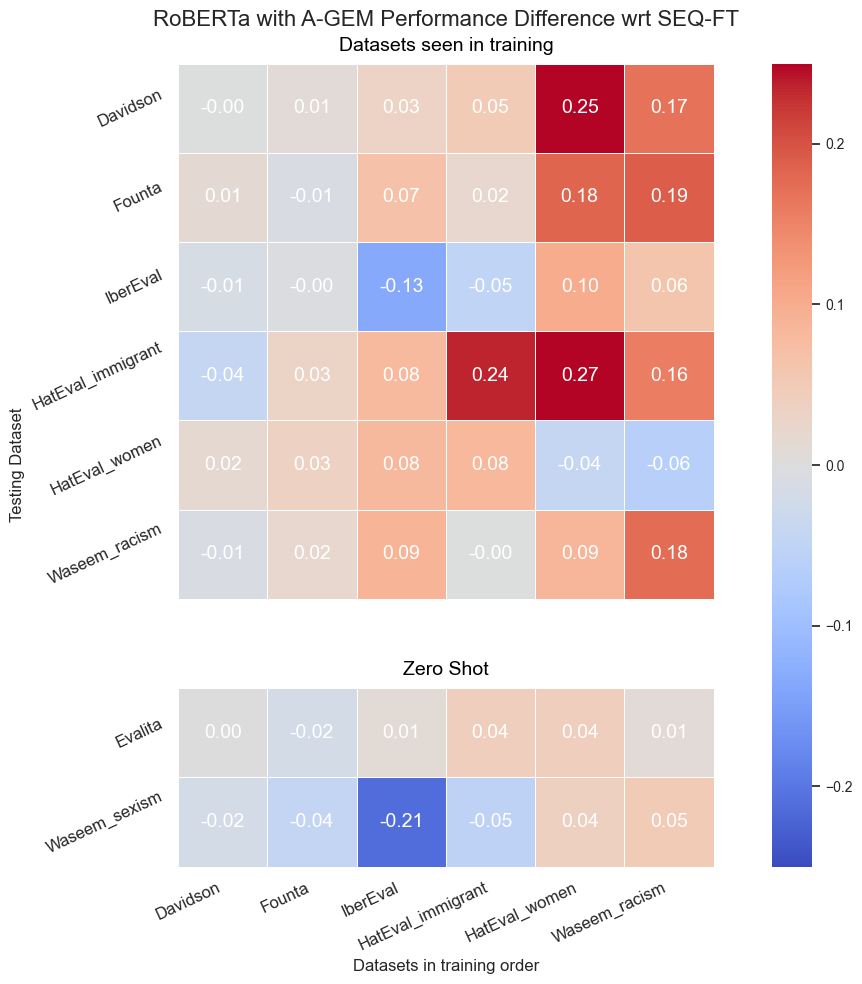

In [312]:
get_heatmap_wrt_baseline(model="FacebookAI/roberta-base", cl_technique="agem", df_experiment=davidson_df, metric="F1 Score", baseline="vanilla_ft")

# UNUSED

Unused so far

In [44]:
# df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name","cl_technique", "model"],).round(2).T

In [45]:
# df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name", "model"],).round(2).T

In [46]:
# df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name", "cl_technique"],).round(2).T

In [47]:
# df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name"],).round(2)

In terms of Technique

In [48]:
# df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["cl_technique"],).round(2)

In [49]:
# df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name", "cl_technique"]).round(2)

In [11]:
df_davidson = df_cl[df_cl["experiment_name"] == "davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism"]
df_evalita = df_cl[df_cl["experiment_name"] == "evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant"]
df_hateval = df_cl[df_cl["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval"]

Last for individual Experiments

In [12]:
df_cl.columns

Index(['model', 'cl_technique', 'experiment_name', 'time', 'best_epochs',
       'current_num_samples_training', 'learning_rate', 'hyperparams', 'last',
       'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric'],
      dtype='object')

HATE CLASSES AND BEST MODELS

In [13]:
df_davidson.pivot_table(columns=["metric"], values=["last"], index=["model", "cl_technique"]).round(2)
# hateBert mas davidson
# fbert ewc davidson

last         
metric                               HATE_f1_score f1_score
model                   cl_technique                       
FacebookAI/roberta-base agem                  0.65     0.72
                        ewc                   0.32     0.58
                        lwf                   0.45     0.65
                        mas                   0.57     0.69
                        vanilla_ft            0.38     0.61
GroNLP/hateBERT         agem                  0.62     0.71
                        ewc                   0.45     0.64
                        lwf                   0.42     0.63
                        mas                   0.49     0.66
                        vanilla_ft            0.43     0.63
diptanu/fBERT           agem                  0.63     0.71
                        ewc                   0.53     0.65
                        lwf                   0.49     0.65
                        mas                   0.51     0.62
                        vanilla_ft            0.56     0.69

In [14]:
df_evalita.pivot_table(columns=["metric"], values=["last"], index=["model", "cl_technique"]).round(2)
# roberta agem  evalita


last         
metric                               HATE_f1_score f1_score
model                   cl_technique                       
FacebookAI/roberta-base agem                  0.76     0.76
                        ewc                   0.71     0.68
                        lwf                   0.66     0.76
                        mas                   0.58     0.68
                        vanilla_ft            0.73     0.70
GroNLP/hateBERT         agem                  0.72     0.71
                        ewc                   0.70     0.68
                        lwf                   0.69     0.75
                        mas                   0.44     0.63
                        vanilla_ft            0.71     0.68
diptanu/fBERT           agem                  0.72     0.72
                        ewc                   0.69     0.68
                        lwf                   0.67     0.73
                        mas                   0.42     0.60
                        vanilla_ft            0.69     0.68

In [15]:
df_hateval.pivot_table(columns=["metric"],values=["last"], index=["model", "cl_technique"]).round(2)
# roberta agem

last         
metric                               HATE_f1_score f1_score
model                   cl_technique                       
FacebookAI/roberta-base agem                  0.73     0.75
                        ewc                   0.68     0.71
                        lwf                   0.66     0.71
                        mas                   0.62     0.63
                        vanilla_ft            0.70     0.75
GroNLP/hateBERT         agem                  0.72     0.74
                        ewc                   0.72     0.73
                        lwf                   0.60     0.66
                        mas                   0.55     0.61
                        vanilla_ft            0.71     0.75
diptanu/fBERT           agem                  0.68     0.73
                        ewc                   0.68     0.71
                        lwf                   0.61     0.68
                        mas                   0.49     0.59
                        vanilla_ft            0.68     0.71

Selected for HP: fbert ewc davidson, hatebert mas davidson, roberta agem both evalita and hateval

In [16]:
performance_columns = ['last', 'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric']

In [17]:
cols = performance_columns + ["model", "cl_technique"]

In [18]:
df_davidson[(df_davidson["model"] == "diptanu/fBERT") & (df_davidson["cl_technique"] == "ewc")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
18,0.654683,0.762860,0.774118,-0.035437,-0.015725,f1_score,diptanu/fBERT,ewc
19,0.529441,0.673312,0.669799,-0.117672,-0.083237,HATE_f1_score,diptanu/fBERT,ewc


In [19]:
df_davidson[(df_davidson["model"] == "GroNLP/hateBERT") & (df_davidson["cl_technique"] == "mas")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
58,0.662117,0.739188,0.756575,-0.002795,0.175057,f1_score,GroNLP/hateBERT,mas
59,0.492765,0.592799,0.616171,-0.008110,0.213204,HATE_f1_score,GroNLP/hateBERT,mas


In [20]:
df_evalita[(df_evalita["model"] == "FacebookAI/roberta-base") & (df_evalita["cl_technique"] == "agem")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
68,0.756028,0.820080,0.835454,-0.017825,0.300889,f1_score,FacebookAI/roberta-base,agem
69,0.762083,0.791701,0.795757,-0.013700,-0.255669,HATE_f1_score,FacebookAI/roberta-base,agem


In [21]:
df_hateval[(df_hateval["model"] == "FacebookAI/roberta-base") & (df_hateval["cl_technique"] == "agem")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
70,0.750605,0.597717,0.562100,0.062787,0.309671,f1_score,FacebookAI/roberta-base,agem
71,0.731788,0.669635,0.640535,0.001400,-0.220252,HATE_f1_score,FacebookAI/roberta-base,agem


Will have to check the fine-grained perf for these particular models

In [22]:
df = pd.read_csv("df_plm_cl_NOES.csv")

In [23]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [24]:
df["experiment_name"].unique()

array(['davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism',
       'evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant',
       'hateval-immigrant-TO-waseem-racism-TO-ibereval'], dtype=object)

In [ ]:
df_davidson = df[df["experiment_name"] == "davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism"]
df_evalita = df[df["experiment_name"] == "evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant"]
df_hateval = df[df["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval"]
df_evalita[df_evalitadf["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream"]

In [94]:
df_davidson["cl_technique"].unique()

array(['vanilla_ft', 'agem', 'ewc', 'lwf', 'mas'], dtype=object)

## Functions for Plots and Viz

In [431]:
def get_line_plot(model, cl_technique, df_experiment, filter_zero_shots=False):

    df_filter = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == cl_technique) ]
    df_clean = clean_up_df(df_filter)
    model = df_clean["Model"].unique()[0]
    # print(df_clean)
    cl_technique = df_clean["Continual Learning Technique"].unique()[0]
    experiment_name = df_clean["Experiment Name"].unique()[0]

    dataset_colors = {
                        "HatEval_immigrant": "#ff00c8",  
                        "Waseem_racism": "#ffadf0", 
                        "Waseem_sexism": "#00FF91",
                        "IberEval": "#487137",           
                        "Evalita": "#bdea79",          
                        "Davidson": "#ffbd8a",         
                        "Founta": "#ff9019",            
                        "HatEval_women": "#3AA49B",      
                    }

    
    times = df_filter["Time"].unique()
    data_line_order = df_filter["Testing Dataset"].unique()
    training_order = df_filter["Training Dataset"].unique()
    if filter_zero_shots:
        df_filter = df_filter[df_filter["Testing Dataset"].isin(training_order)]

    
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    sns.lineplot(data=df_clean, 
                    x="Time", 
                    y="F1 Score", 
                    hue="Testing Dataset",
                    palette=dataset_colors

                    )

    lines = ax.get_lines()

    for ds_t, line, time in zip(data_line_order, lines, times):
        if ds_t in list(training_order) and list(data_line_order).index(ds_t) == list(training_order).index(ds_t):

            line.set_marker('o')
            line.set_markersize(10)
            line.set_fillstyle('full')
            line.set_linewidth(2.45)
            xdata = line.get_xdata()

            indices_to_mark = [i for i, x in enumerate(xdata) if x == time]
            
            if indices_to_mark:
                line.set_markevery(indices_to_mark)

        
    plt.xticks(times)
    plt.xlabel("Time")

    plt.ylabel("Macro F1")
    ax.set_ylim(0, 1)
    ax.set_xlim(0, times.max())

    leg = plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left', borderaxespad=0.)
    for line in leg.get_lines():
        line.set_linewidth(3)   # default is ~1.5

    title = f"{model} with {cl_technique} \nF1 Performance across time by dataset"
    plt.title(title + f"\n{experiment_name}")



In [180]:
get_line_plot(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson)

NameError: name 'df_davidson' is not defined

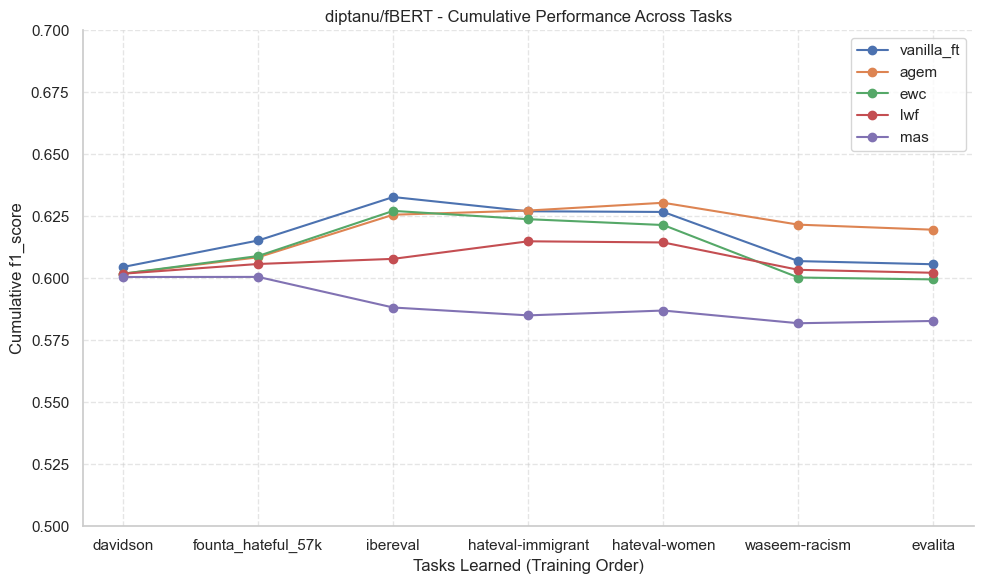

In [90]:
def plot_cumulative_learning_curves(model, df_experiment, metric="f1_score"):

    # Filter only for the model
    df_model = df_experiment[df_experiment["model"] == model].copy()

    # Get list of CL techniques and ordered training tasks
    cl_methods = df_model["cl_technique"].unique().tolist()
    training_order = df_model["dataset_currently_training"].unique().tolist()
    
    plt.figure(figsize=(10,6))
    sns.set_theme(style="whitegrid")

    for cl in cl_methods:
        df_cl = df_model[df_model["cl_technique"] == cl]
        
        # Compute cumulative performance per task (mean over testing datasets)
        cumulative_perf = []
        for i, task in enumerate(training_order):
            # All rows where dataset_currently_training is up to current task
            df_subset = df_cl[df_cl["dataset_currently_training"].isin(training_order[:i+1])]
            if not df_subset.empty:
                # Average metric over testing datasets
                mean_val = df_subset[metric].mean()
            else:
                mean_val = np.nan
            cumulative_perf.append(mean_val)
        
        # Optional: compute std over repeated experiments if multiple entries exist
        std_vals = []
        for i, task in enumerate(training_order):
            df_subset = df_cl[df_cl["dataset_currently_training"].isin(training_order[:i+1])]
            if not df_subset.empty:
                std_val = df_subset[metric].std()
            else:
                std_val = 0
            std_vals.append(std_val)
        
        cumulative_perf = np.array(cumulative_perf)
        # std_vals = np.array(std_vals)
        
        plt.plot(training_order, cumulative_perf, marker='o', label=cl)
        # plt.fill_between(range(len(training_order)), cumulative_perf-std_vals, cumulative_perf+std_vals, alpha=0.2)

    plt.xlabel("Tasks Learned (Training Order)")
    plt.ylabel(f"Cumulative {metric}")
    plt.title(f"{model} - Cumulative Performance Across Tasks")
    plt.ylim(0.5,0.7)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    sns.despine()
    plt.tight_layout()
    plt.show()

plot_cumulative_learning_curves(model="diptanu/fBERT", df_experiment=df, metric="f1_score")

In [30]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [ ]:

def get_heatmap(model, cl_technique, df_experiment, metric="F1 Score"): 

    df_filter = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == cl_technique)]
    # df_filter = (df_filter["metric"] == metric)
    
    df_clean = clean_up_df(df_filter)
    model = df_clean["Model"].unique()[0]
    # print(df_clean)
    cl_technique = df_clean["Continual Learning Technique"].unique()[0]
    experiment_name = df_clean["Experiment Name"].unique()[0]

    dataset_colors = {
                        "HatEval_immigrant": "#ff00c8",  
                        "Waseem_racism": "#ffadf0", 
                        "Waseem_sexism": "#00FF91",
                        "IberEval": "#487137",           
                        "Evalita": "#bdea79",          
                        "Davidson": "#ffbd8a",         
                        "Founta": "#ff9019",            
                        "HatEval_women": "#3AA49B",      
                    }



    # Unique training datasets order
    training_order = df_clean["Training Dataset"].unique().tolist()
    # metric = df_clean["metric"].unique()[0]

    # Identify zero-shot datasets
    df_clean["zero_shot"] = ~df_clean["Testing Dataset"].isin(training_order)

    df_seen = df_clean[~df_clean["zero_shot"]]
    df_zero = df_clean[df_clean["zero_shot"]]

    # Pivot data
    heat_seen = df_seen.pivot_table(
        values=metric, 
        index="Testing Dataset", 
        columns="Training Dataset"
    )
    heat_zero = df_zero.pivot_table(
        values=metric, 
        index="Testing Dataset", 
        columns="Training Dataset"
    )

    # Align columns and rows
    all_cols = training_order
    heat_seen = heat_seen.reindex(columns=all_cols)
    heat_seen = heat_seen.reindex(index=all_cols)
    heat_zero = heat_zero.reindex(columns=all_cols)

    # Add a NaN row between seen and zero-shot for visual separation
    gap_row = pd.DataFrame(np.nan, index=[""], columns=all_cols)
    heat_combined = pd.concat([heat_seen, gap_row, heat_zero])

    title = f"{model} with {cl_technique} Time Performance\n."

    sns.set_theme(style="whitegrid") 
    sns.color_palette("YlOrBr", as_cmap=True)
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        heat_combined,
        # cmap=cmap,
        linewidths=0.6,
        linecolor='white',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True,
        annot_kws={"size": 14, "color": "black"},
        vmin=0,
        vmax=1,
        # palette=dataset_colors
    )

    # Formatting
    plt.xlabel("Datasets in training order")
    plt.ylabel("Testing Dataset")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=25, ha='right', fontsize=12)

    # Make the NaN row white (gap)
    for i, label in enumerate(heat_combined.index):
        if label == "":
            ax.add_patch(plt.Rectangle((0, i), len(all_cols), 1, fill=True, color="white", lw=0))

    # Add mini titles close to their respective heatmaps
    if len(heat_seen) > 0:
        first_seen_idx = 0
        ax.text(len(all_cols)/2, first_seen_idx - 0.1, "Datasets seen in training",
                ha='center', va='bottom', fontsize=14, color='black')

    if len(heat_zero) > 0:
        first_zero_shot_idx = heat_seen.shape[0] + 1  # first row after gap
        ax.text(len(all_cols)/2, first_zero_shot_idx - 0.1, "Zero Shot",
                ha='center', va='bottom', fontsize=14, color='black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
get_heatmap(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson, metric="F1 Score")

In [32]:
df["cl_technique"].unique()

array(['vanilla_ft', 'agem', 'ewc', 'lwf', 'mas'], dtype=object)

In [118]:

def pivot_and_delta(df, training_order, metric):
    if df.empty:
        return pd.DataFrame(columns=training_order)
    heat = df.pivot_table(values=metric, index="dataset_currently_testing", columns="dataset_currently_training")
    heat = heat[training_order]  # align columns
    heat_delta = heat.copy()
    # First column: force 0
    heat_delta.iloc[:, 0] = 0
    # Remaining columns: delta vs previous
    for i in range(1, heat.shape[1]):
        heat_delta.iloc[:, i] = heat.iloc[:, i] - heat.iloc[:, i-1]
    return heat_delta


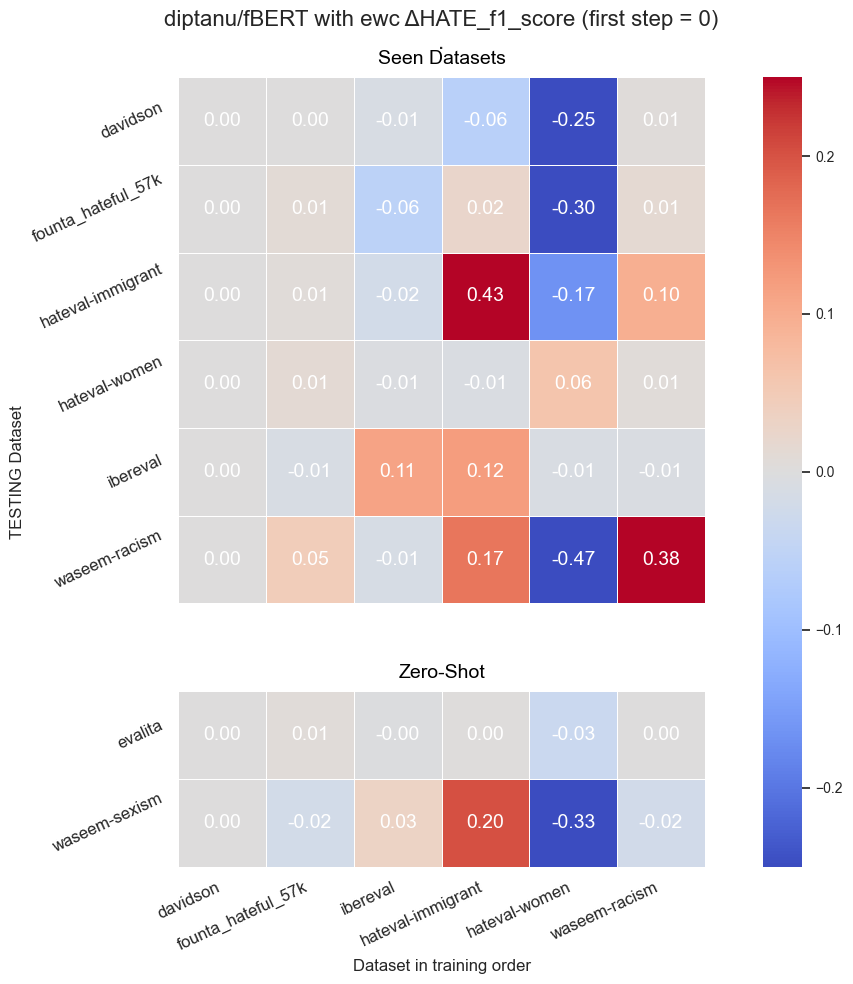

In [34]:

def get_heatmap_delta_vs_previous_zeroed_first(model, cl_technique, df_experiment, metric="f1_score"):

    df_filter = df_experiment[
        (df_experiment["model"] == model) & 
        (df_experiment["cl_technique"] == cl_technique)
    ].copy()

    # Unique training datasets order
    training_order = df_filter["dataset_currently_training"].unique().tolist()

    # Identify zero-shot datasets
    df_filter["zero_shot"] = ~df_filter["dataset_currently_testing"].isin(training_order)
    df_seen = df_filter[~df_filter["zero_shot"]]
    df_zero = df_filter[df_filter["zero_shot"]]

    # Pivot and compute deltas, first column explicitly 0

    heat_seen_delta = pivot_and_delta(df_seen, training_order, metric)
    heat_zero_delta = pivot_and_delta(df_zero, training_order, metric)

    # Add NaN gap row
    gap_row = pd.DataFrame(np.nan, index=[""], columns=training_order)
    heat_combined = pd.concat([heat_seen_delta, gap_row, heat_zero_delta])

    title = f"{model} with {cl_technique} Δ{metric} (first step = 0)\n."

    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        heat_combined,
        cmap="coolwarm",
        linewidths=0.6,
        linecolor='white',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True,
        annot_kws={"size": 14, "color": "white"},
        vmin=-0.25,
        vmax=0.25
    )

    # Formatting
    plt.xlabel("Dataset in training order")
    plt.ylabel("TESTING Dataset")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=25, ha='right', fontsize=12)

    # Make the NaN row white
    for i, label in enumerate(heat_combined.index):
        if label == "":
            ax.add_patch(plt.Rectangle((0, i), len(training_order), 1, fill=True, color="white", lw=0))

    # Mini titles
    if not heat_seen_delta.empty:
        ax.text(len(training_order)/2, 0 - 0.1, "Seen Datasets", ha='center', va='bottom', fontsize=14, color='black')
    if not heat_zero_delta.empty:
        first_zero_shot_idx = heat_seen_delta.shape[0] + 1
        ax.text(len(training_order)/2, first_zero_shot_idx - 0.1, "Zero-Shot", ha='center', va='bottom', fontsize=14, color='black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
get_heatmap_delta_vs_previous_zeroed_first(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson, metric="HATE_f1_score")

In [122]:
df_davidson.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

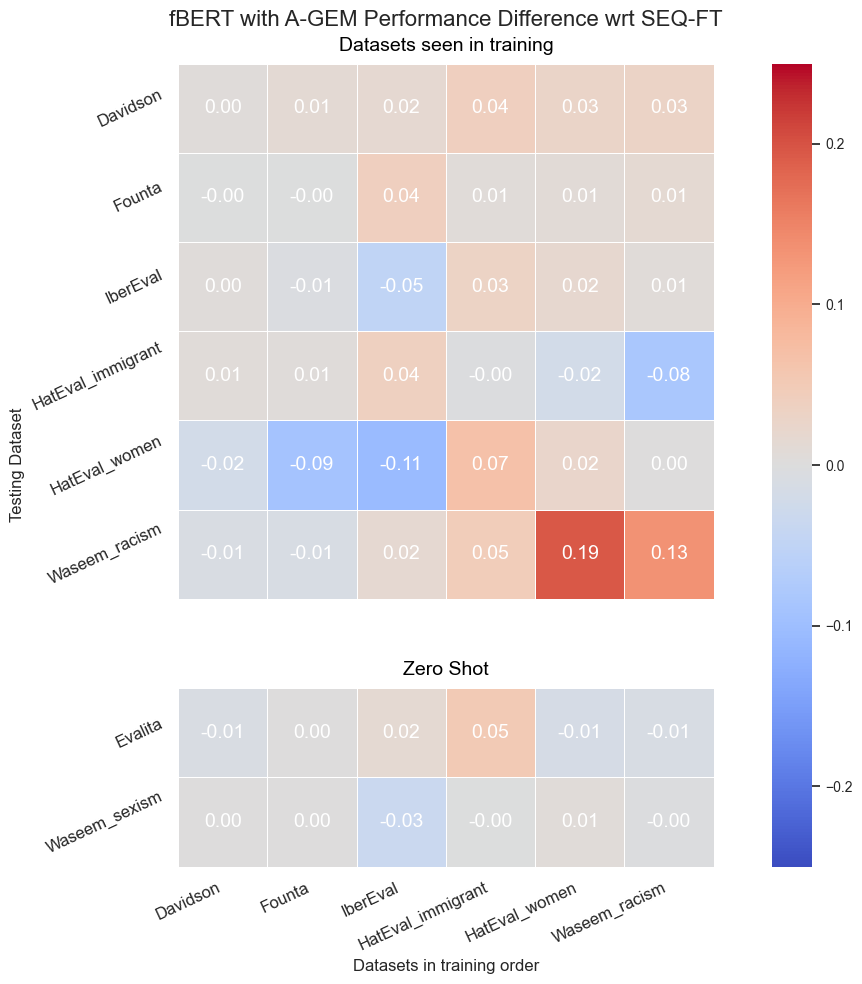

In [309]:

def get_heatmap_wrt_baseline(model, cl_technique, df_experiment, metric="f1_score", baseline="vanilla_ft"): 
    # metric_filter = (df_experiment["metric"] == metric)

    df_filter = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == cl_technique) ]
    df_filter_baseline = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == baseline) ]
    df_filter = clean_up_df(df_filter)
    df_filter_baseline = clean_up_df(df_filter_baseline)

    model = df_filter["Model"].unique()[0]
    # print(df_filter.columns)
    diff_values = df_filter[metric].values - df_filter_baseline[metric].values
    df_filter[metric] = diff_values


    # print(df_filter)
    cl_technique = df_filter["Continual Learning Technique"].unique()[0]
    experiment_name = df_filter["Experiment Name"].unique()[0]


    # Unique training datasets order
    training_order = df_filter["Training Dataset"].unique().tolist()

    # Identify zero-shot datasets
    df_filter["zero_shot"] = ~df_filter["Testing Dataset"].isin(training_order)

    df_seen = df_filter[~df_filter["zero_shot"]]
    df_zero = df_filter[df_filter["zero_shot"]]

    # df_seen = clean_up_df(df_seen)
    # df_zero = clean_up_df(df_zero)

    # metric = df_seen["metric"].unique()[0]

    # Pivot data
    heat_seen = df_seen.pivot_table(values=metric, index="Testing Dataset", columns="Training Dataset")
    heat_zero = df_zero.pivot_table(values=metric, index="Testing Dataset", columns="Training Dataset")

    # Align columns and rows
    all_cols = training_order
    heat_seen = heat_seen.reindex(columns=all_cols).reindex(index=all_cols)
    heat_zero = heat_zero.reindex(columns=all_cols)

    # Add a NaN row between seen and zero-shot for visual separation
    gap_row = pd.DataFrame(np.nan, index=[""], columns=all_cols)
    heat_combined = pd.concat([heat_seen, gap_row, heat_zero])

    title = f"{model} with {cl_technique} Performance Difference wrt SEQ-FT"

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        heat_combined,
        cmap="coolwarm",
        linewidths=0.6,
        linecolor='white',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True,
        annot_kws={"size": 14, "color": "white"},
        vmin=-0.25,
        vmax=0.25
    )

    # Formatting
    plt.xlabel("Datasets in training order")
    plt.ylabel("Testing Dataset")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=25, ha='right', fontsize=12)

    # Make the NaN row white (gap)
    for i, label in enumerate(heat_combined.index):
        if label == "":
            ax.add_patch(plt.Rectangle((0, i), len(all_cols), 1, fill=True, color="white", lw=0))

    # Add mini titles close to their respective heatmaps
    # print(heat_zero)
    if len(heat_seen) > 0:
        ax.text(len(all_cols)/2, 0 - 0.1, "Datasets seen in training", ha='center', va='bottom', fontsize=14, color='black')
    if len(heat_zero) > 0:
        first_zero_shot_idx = heat_seen.shape[0] + 1
        ax.text(len(all_cols)/2, first_zero_shot_idx - 0.1, "Zero Shot", ha='center', va='bottom', fontsize=14, color='black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.title(title, fontsize=16, pad=27)
    plt.tight_layout()
    plt.show()
    
get_heatmap_wrt_baseline(model="diptanu/fBERT", cl_technique="agem", df_experiment=df_davidson, metric="F1 Score", baseline="vanilla_ft")

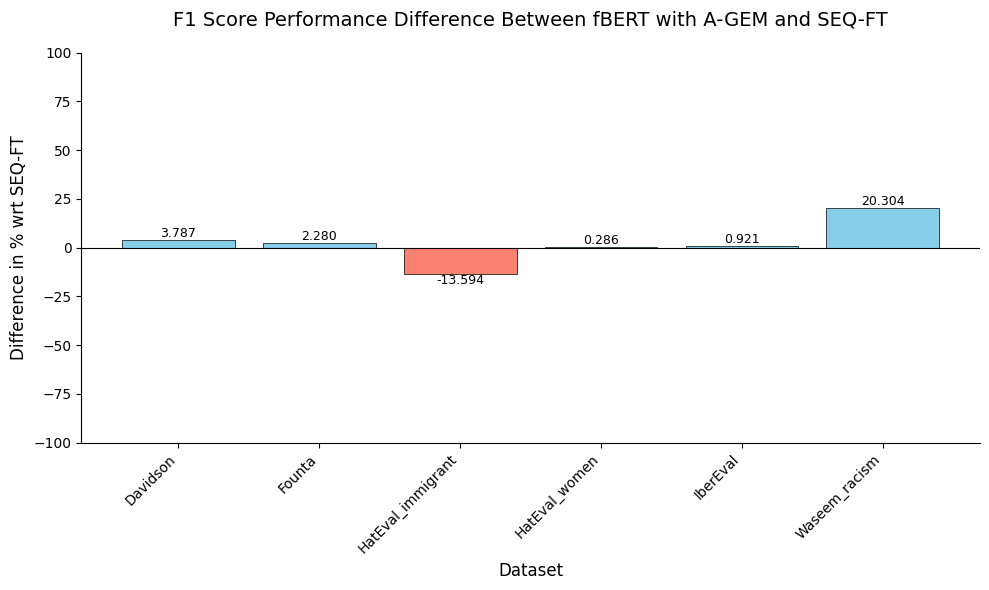

In [257]:

def get_difference_last_performance(model, cl_technique, df_experiment, metric="f1_score", baseline="vanilla_ft"):
    
    max_time = df_experiment["time"].max()
    df_experiment = df_experiment[(df_experiment["model"] == model)]
    df_experiment = df_experiment[(df_experiment["cl_technique"] == cl_technique) | (df_experiment["cl_technique"] == baseline)]
    df_experiment = df_experiment[df_experiment["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream"]
    df_experiment = clean_up_df(df_experiment)
    # print(df_experiment.columns)
    df_pivot = df_experiment[df_experiment["Time"] == max_time].pivot_table(values=metric, index="Testing Dataset", columns="Continual Learning Technique")
    # print(df_pivot.columns)
    cl_technique = df_experiment["Continual Learning Technique"].unique()[1]
    # print(cl_technique)
    # print(df_pivot)
    df_pivot['difference'] = ((df_pivot[cl_technique] - df_pivot["SEQ-FT"]) / df_pivot["SEQ-FT"]) * 100
    # df_pivot['difference'] = (df_pivot[cl_technique] - df_pivot["SEQ-FT"])

    
    model = df_experiment["Model"].unique()[0]
    # print(df_clean)
    experiment_name = df_experiment["Experiment Name"].unique()[0]


    dataset_colors = {
                        "HatEval_immigrant": "#ff00c8",  
                        "Waseem_racism": "#ffadf0", 
                        "Waseem_sexism": "#00FF91",
                        "IberEval": "#487137",           
                        "Evalita": "#bdea79",          
                        "Davidson": "#ffbd8a",         
                        "Founta": "#ff9019",            
                        "HatEval_women": "#3AA49B",      
                    }


    # Set style to plain white background
    plt.style.use('default')  # Reset to default style
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['grid.color'] = 'none'  # Remove grid lines

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        df_pivot.index,
        df_pivot['difference'],
        color=['skyblue' if x > 0 else 'salmon' for x in df_pivot['difference']],
        edgecolor='black',  # Add black borders to bars
        linewidth=0.5, 
        
    )

    # Customize labels and title
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel(f'Difference in % wrt SEQ-FT', fontsize=12)
    plt.title(f'{metric} Performance Difference Between {model} with {cl_technique} and SEQ-FT', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height > 0 else 'top'
        y_pos = height + 0.005 if height > 0 else height - 0.005  # Offset for clarity
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            y_pos,
            f'{height:.3f}',
            ha='center',
            va=va,
            fontsize=9
        )

    # Add a zero reference line
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    # Remove spines (top and right borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylim(-100, 100)
    max = df_pivot['difference'].max()

    if max > 50:
        plt.ylim(-(max + 100), max + 100)
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()
    
get_difference_last_performance(model="diptanu/fBERT", cl_technique="agem", df_experiment=df_davidson, metric="F1 Score", baseline="vanilla_ft")

In [37]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

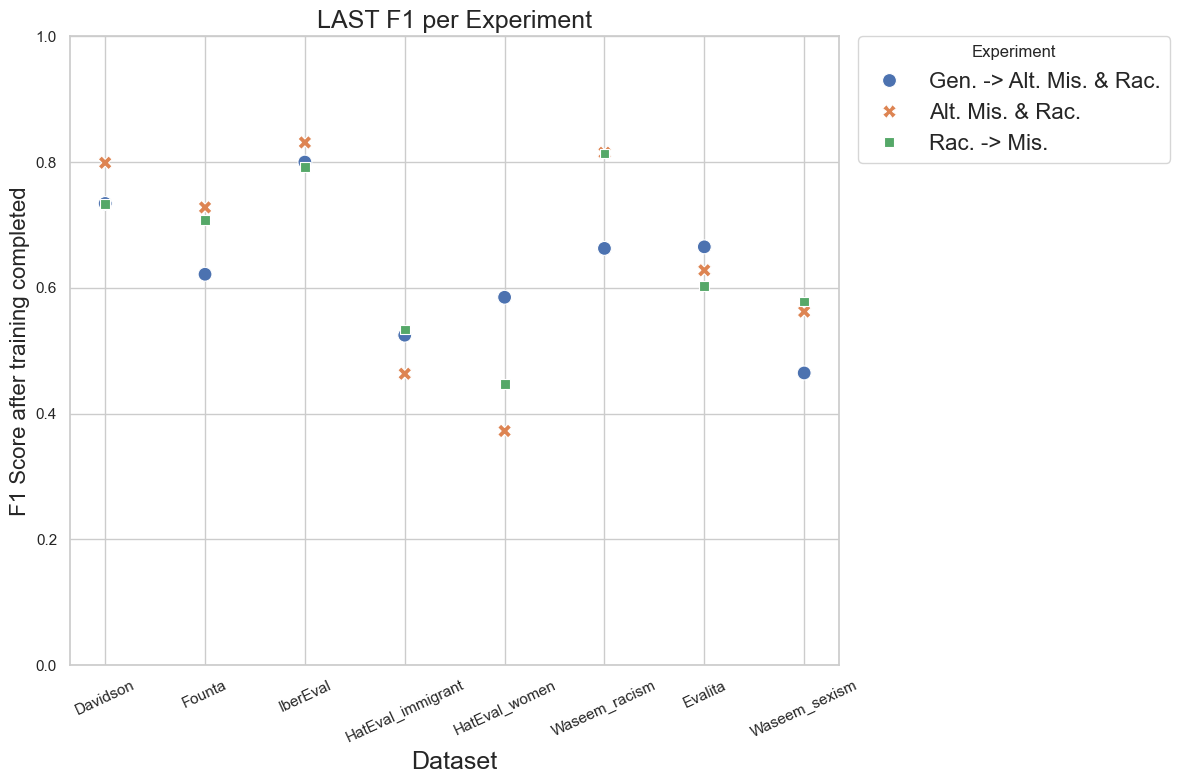

In [147]:
def get_scatter_final_perf_by_exp(df, cl_technique, model, metric="f1_score"):
    
    df = df[(df["cl_technique"] == cl_technique) & (df["model"] == model)]
    list_dfs = []
    experiments = df["experiment_name"].unique()
    dataset_colors = {
                        "HatEval_immigrant": "#ff00c8",  
                        "Waseem_racism": "#ffadf0", 
                        "Waseem_sexism": "#00FF91",
                        "IberEval": "#487137",           
                        "Evalita": "#bdea79",          
                        "Davidson": "#ffbd8a",         
                        "Founta": "#ff9019",            
                        "HatEval_women": "#3AA49B",      
                    }

    for exp in experiments:
        exp_df = df[df["experiment_name"] == exp]
        max_time = exp_df["time"].max()
        last_performance_df = exp_df[exp_df["time"] == max_time]
        list_dfs.append(last_performance_df)
    merged_df = pd.concat(list_dfs)

    merged_df = clean_up_df(merged_df)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=merged_df,
        x="Testing Dataset",
        y=metric,
        hue='Experiment Name',
        style='Experiment Name',
        s=100
    )

    plt.xticks(rotation=25)
    plt.ylim(0, 1)
    plt.ylabel("F1 Score after training completed", fontsize=16)
    plt.xlabel("Dataset", fontsize=18)
    plt.title("LAST F1 per Experiment", fontsize=18)
    plt.legend(title="Experiment",     bbox_to_anchor=(1.025, 1),  # (x, y) position of the legend
                                        loc='upper left',          # anchor point of the legend
                                        borderaxespad=0.,          # padding between legend and plot
                                        fontsize=16)
    plt.tight_layout()
    plt.show()

get_scatter_final_perf_by_exp(df=df, cl_technique="ewc", model="diptanu/fBERT", metric="F1 Score")

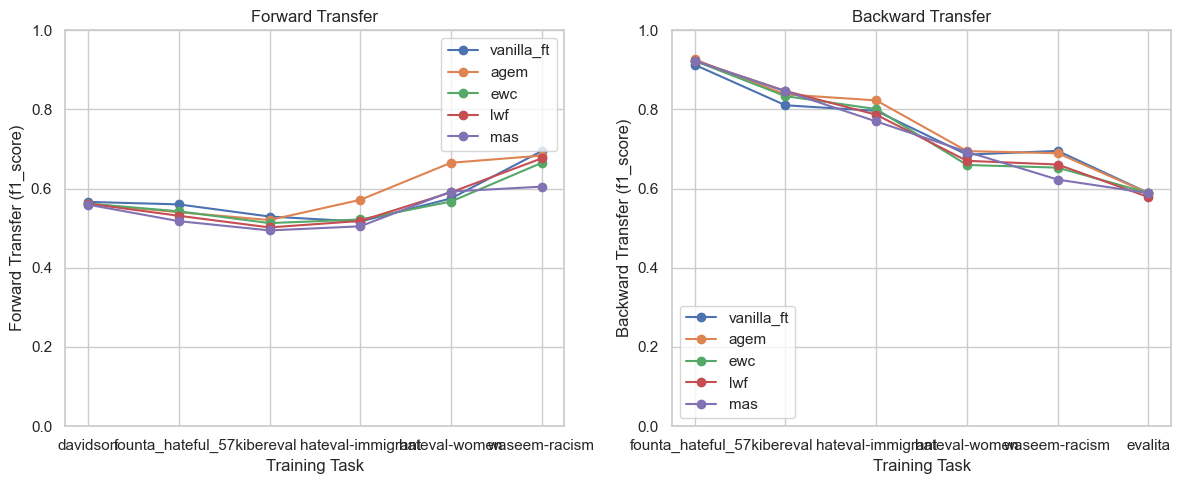

In [39]:
def plot_forward_backward_transfer(model, df_experiment=df, metric="f1_score"):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    df_model = df_experiment[df_experiment["model"] == model].copy()
    cl_methods = df_model["cl_technique"].unique().tolist()
    training_order = df_model["dataset_currently_training"].unique().tolist()
    testing_order = df_model["dataset_currently_testing"].unique().tolist()

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12,5))

    # Forward Transfer
    plt.subplot(1,2,1)
    for cl in cl_methods:
        df_cl = df_model[df_model["cl_technique"] == cl]
        fwt = []
        for i, train_task in enumerate(training_order[:-1]):  # forward to future tasks
            future_tasks = training_order[i+1:]
            vals = []
            for ft in future_tasks:
                subset = df_cl[
                    (df_cl["dataset_currently_training"] == train_task) &
                    (df_cl["dataset_currently_testing"] == ft)
                ]
                if not subset.empty:
                    vals.append(subset[metric].values[0])
            fwt.append(np.mean(vals) if vals else 0)
        plt.plot(training_order[:-1], fwt, marker='o', label=cl)
    plt.xlabel("Training Task")
    plt.ylabel(f"Forward Transfer ({metric})")
    plt.title("Forward Transfer")
    plt.legend()
    plt.ylim(0,1)

    # Backward Transfer
    plt.subplot(1,2,2)
    for cl in cl_methods:
        df_cl = df_model[df_model["cl_technique"] == cl]
        bwt = []
        for i, train_task in enumerate(training_order[1:], start=1):
            past_tasks = training_order[:i]  # tasks already learned
            vals = []
            for pt in past_tasks:
                subset = df_cl[
                    (df_cl["dataset_currently_training"] == train_task) &
                    (df_cl["dataset_currently_testing"] == pt)
                ]
                if not subset.empty:
                    vals.append(subset[metric].values[0])
            # backward transfer = delta vs previous performance (forgetting)
            bwt.append(np.mean(vals) if vals else 0)
        plt.plot(training_order[1:], bwt, marker='o', label=cl)
    plt.xlabel("Training Task")
    plt.ylabel(f"Backward Transfer ({metric})")
    plt.title("Backward Transfer")
    plt.ylim(0,1)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_forward_backward_transfer( model="diptanu/fBERT")